In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')


## 2.

For df1:

- Take a look at the data in df1.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [3]:
df1.group.value_counts()

a    102
b     98
Name: group, dtype: int64

In [4]:
df1.time.value_counts()

two    100
one    100
Name: time, dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [8]:
df1.describe()

,x
count,200.000000
mean,6.511559
std,2.180756
min,0.556924
25%,4.895169
50%,6.507704
75%,8.261932
max,12.958625


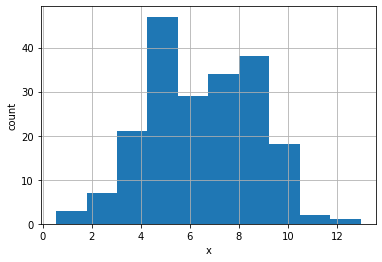

In [11]:
df1.x.hist()
plt.xlabel('x')
plt.ylabel('count')
plt.show()

- Does x increase from time one to time two?

In [15]:
df1.x[df1.time == 'one'].mean()

5.726669425801799

In [16]:
df1.x[df1.time == 'two'].mean()

7.296448106590939

In [78]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

**The average x increases from one to two**

In [80]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [81]:
df1.pivot_table('x', 'group', 'time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [84]:
df1.pivot_table(values='x', index='group', columns='time', aggfunc='mean')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [85]:
df1.pivot_table(values='x', index='group', columns='time', aggfunc='count')

time,one,two
group,,
a,87,15
b,13,85


In [86]:
pd.crosstab(df1.group, df1.time)

time,one,two
group,,
a,87,15
b,13,85


- Visualize the relationship between x and time.

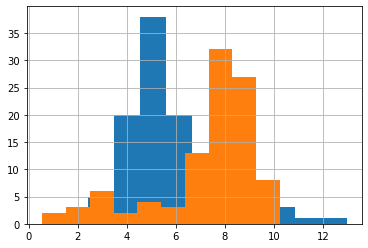

In [24]:
df1.x[df1.time == 'one'].hist()
df1.x[df1.time == 'two'].hist();

- Run a statistical test to further examine the relationship between these features.

In [25]:
stats.mannwhitneyu(df1.x[df1.time == 'one'], df1.x[df1.time == 'two'], alternative='less')

MannwhitneyuResult(statistic=2600.0, pvalue=2.2741014828327088e-09)

## 3.

For df2:

- Take a look at the data in df2.

In [27]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [30]:
df2.describe()

,x,y
count,200.000000,200.000000
mean,99.980573,606.099784
std,7.753863,26.958585
min,84.542520,542.096437
25%,93.056095,586.579382
50%,100.095115,599.022923
75%,107.320842,629.098231
max,114.606179,665.250458


- Visualize the relationship between x and y.

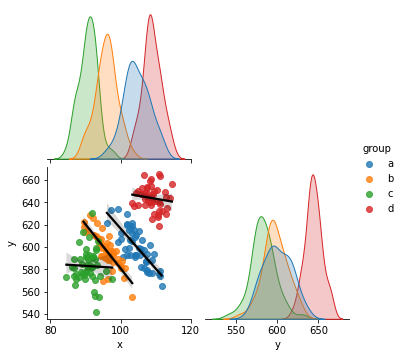

In [101]:
sns.pairplot(data=df2, hue='group', corner=True, kind='reg', plot_kws={'line_kws':{'color':'black'}});

- How would you describe the relationship between x and y?

**There seems to be a positive correlation between x and y**

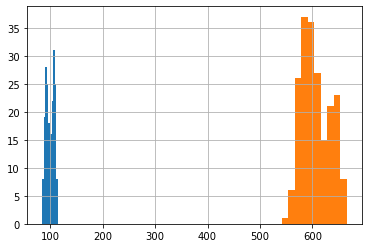

In [37]:
df2.x.hist()
df2.y.hist();

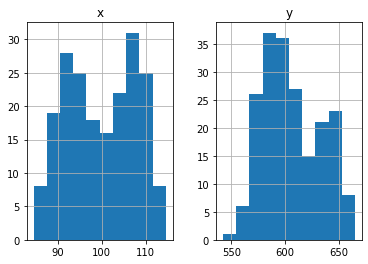

In [39]:
df2.hist();

- Run a statistical test to examine the relationship between x and y.

In [49]:
stats.pearsonr(df2.x, df2.y)

(0.5693902765694356, 1.3960403186192216e-18)

In [50]:
stats.pearsonr(df2.x[df2.group == 'a'], df2.y[df2.group == 'a'])

(-0.770465986745426, 6.039101149896113e-11)

In [51]:
stats.pearsonr(df2.x[df2.group == 'b'], df2.y[df2.group == 'b'])

(-0.8015459032219339, 2.689971023670272e-12)

In [52]:
stats.pearsonr(df2.x[df2.group == 'c'], df2.y[df2.group == 'c'])

(-0.03342773584102764, 0.8177377121305711)

In [53]:
stats.pearsonr(df2.x[df2.group == 'd'], df2.y[df2.group == 'd'])

(-0.13984004031571184, 0.33275553836880256)

## 4.

For df3:

- Take a look at the data in df3

In [42]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surgeon  1000 non-null   object
 1   surgery  1000 non-null   object
 2   success  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


- Which surgeon has the higher success rate?

In [88]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

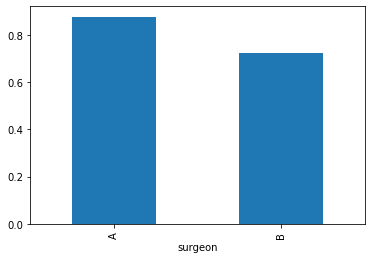

In [91]:
df3.groupby('surgeon').success.mean().plot.bar();

- If you had to have heart bypass surgery, which surgeon would you go to?

In [70]:
df3.success[(df3.surgeon=='A') & (df3.surgery == 'appendectomy')].mean()

0.9343832020997376

In [74]:
df3.success[(df3.surgeon=='A') & (df3.surgery == 'appendectomy')].count()

381

In [71]:
df3.success[(df3.surgeon=='B') & (df3.surgery == 'appendectomy')].mean()

0.9313725490196079

In [75]:
df3.success[(df3.surgeon=='B') & (df3.surgery == 'appendectomy')].count()

102

In [72]:
df3.success[(df3.surgeon=='A') & (df3.surgery == 'heart bypass')].mean()

0.6565656565656566

In [76]:
df3.success[(df3.surgeon=='A') & (df3.surgery == 'heart bypass')].count()

99

In [73]:
df3.success[(df3.surgeon=='B') & (df3.surgery == 'heart bypass')].mean()

0.6722488038277512

In [77]:
df3.success[(df3.surgeon=='B') & (df3.surgery == 'heart bypass')].count()

418

In [97]:
df3.pivot_table(values='success', index='surgeon', columns='surgery', aggfunc='mean')

surgery,appendectomy,heart bypass
surgeon,,
A,0.934383,0.656566
B,0.931373,0.672249


In [98]:
df3.pivot_table(values='success', index='surgeon', columns='surgery', aggfunc='count')

surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418


**Surgeon B has higher success rate and performs a lot more surgeries**

**Things to practice**
- [x] How to use groupby with more than 2 variables
- [x] How to use pivot table with more than 2 variables
- [x] Use Zachs nb as a guide
- [ ] Figure out how to use subplots using for loops
    - There are examples in the Simpson's Paradox nb from Zach
    - There are also examples from the explore.py file from Maggie